# PROYECTO HOSPITALIZACIONES

## Análisis exploratorio y preparación de los datos

## 1) Importamos las librerías

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 

## 2) Cargamos el dataset y leemos como dataframe

In [2]:
#pip install openpyxl

In [3]:
# Leemos el dataset y cargamos las primeras 5 filas
df=pd.read_excel('BBDD_Hospitalización.xlsx') 
df.head() 

c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [4]:
df.tail()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3) Análisis exploratorio de datos

### a) Entendiendo los datos

In [5]:
# Número de filas y columnas
df.shape

(570, 20)

In [6]:
# Información por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [7]:
# Identificamos columnas categóricas y numéricas
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('Número de columnas numéricas:', numeric_data.shape[1])
print('Número de columnas categóricas:', categorical_data.shape[1])

Número de columnas numéricas: 5
Número de columnas categóricas: 15


In [8]:
# Identificamos valores únicos por columna
for col in df.columns:
  print(df[col].unique())

[ 53.  56.  57.  55.  67.  69.  44.  54.  68.  43.  65.  62.  71.  64.
  77.  75.  73.  63.  66.  84.  42.  61.  47.  48.  49.  81.  52.  74.
  70.  58.  59.  60.  50. 143. 151.  76.  78.  46.  51.  79.  39.  72.
  80.  45.  82.  nan]
['NO' 'SI' nan]
['NO' 'SI' nan]
[  4.     7.7   29.     7.     6.2    6.      nan   5.7    4.3    5.19
   4.5   14.    10.     9.    25.    91.8   21.    98.     7.5   10.8
  10.5   90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9
  20.    40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5
  15.     5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7
  18.    27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3
   6.5    7.2    5.97   6.98  12.    24.     8.9    6.3    9.3   12.6
   5.5   13.8   13.4   11.    21.3    7.1   11.9    3.8   15.6    5.4
  22.    12.8    4.1    2.     9.4    4.49  11.5    5.31  33.6   48.3
   5.11   8.8   26.     0.6   31.    27.6   83.    15.85  20.2   14.9
   2.5    3.9   18.2   28.    33

In [9]:
# Cantidad de valores únicos por columna
df.nunique()

EDAD                                                                          45
DIABETES                                                                       2
HOSPITALIZACIÓN ULTIMO MES                                                     2
PSA                                                                          146
BIOPSIAS PREVIAS                                                               2
VOLUMEN PROSTATICO                                                             2
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                        5
NUMERO DE MUESTRAS TOMADAS                                                    12
CUP                                                                            2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                              4
BIOPSIA                                                                       11
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA      6
FIEBRE                      

### b) Limpiando los datos

#### 1) Quitamos coumnas irrelevantes

No se eliminó ninguna columna por considerar que todos los datos son relevates en principio.

#### 2) Transformaciones de datos

In [10]:
# Detectamos que la columna de número de dís post biopsia no presenta todos datos numéricos y analizamos
conteo_no = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()['NO']
conteo_no

# Observamos que de los 570 registros, 542 presentan e valor 'NO' en dicha columna por lo que se hace necesario
# efectuar un reemplazo y normalización de los valores

542

In [11]:
# Reemplazamos valores numéricos por 'SI' y cambiamos el nombre de la columna
df['infeccion_post_biopsia'] = np.where(pd.to_numeric(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], errors='coerce').notnull(), 'Si', df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'])
df['infeccion_post_biopsia'].unique()

array(['Si', 'NO', nan], dtype=object)

In [12]:
#cambiamos los nombres de las columnas para simplificar
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC', 'infeccion_post_biopsia'],
      dtype='object')

In [13]:
df.rename(columns={ 'EDAD': 'edad', 
                    'DIABETES': 'diabetes',
                    'HOSPITALIZACIÓN ULTIMO MES': 'hospitalizacion_ultimo_mes',
                    'PSA': 'antigeno_prostatico',
                    'BIOPSIAS PREVIAS': 'biopsia_previa',
                    'VOLUMEN PROSTATICO': 'volumen_prostatico',
                    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'antibiotico_profilaxis',
                    'NUMERO DE MUESTRAS TOMADAS': 'nro_muestras',
                    'CUP': 'cateter_biopsia',
                    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'enfermedad_pulmonar_cronica',
                    'BIOPSIA': 'resultado_biopsia',
                    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'dias_infeccion_post_biopsia',
                    'FIEBRE': 'fiebre',
                    'ITU': 'infeccion_urinaria',
                    'TIPO DE CULTIVO': 'tipo_cultivo',
                    'AGENTE AISLADO': 'agente_aislado',
                    'PATRON DE RESISTENCIA': 'patron_resistencia',
                    'HOSPITALIZACION': 'hospitalizacion',
                    'DIAS HOSPITALIZACION MQ': 'dias_hospitalizacion_quirurgico',
                    'DIAS HOSPITALIZACIÓN UPC': 'dias_hospitalizacion_critico'
}, inplace=True)
df.head()

,edad,diabetes,hospitalizacion_ultimo_mes,antigeno_prostatico,biopsia_previa,volumen_prostatico,antibiotico_profilaxis,nro_muestras,cateter_biopsia,enfermedad_pulmonar_cronica,...,dias_infeccion_post_biopsia,fiebre,infeccion_urinaria,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hospitalizacion_quirurgico,dias_hospitalizacion_critico,infeccion_post_biopsia
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,1,SI,NO,NO,NO,NO,SI,2.0,0.0,Si
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,1,SI,NO,NO,NO,NO,SI,5.0,0.0,Si
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0,Si
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,1,SI,NO,NO,NO,NO,SI,5.0,0.0,Si
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0,Si


In [14]:
# Normalizamos los valores de 'enfermedad_pulmonar_cronica'

df['enfermedad_pulmonar_cronica'].unique()

array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI', nan], dtype=object)

In [15]:
conteo_asma = df['enfermedad_pulmonar_cronica'].value_counts()['SI, ASMA']
conteo_asma

4

In [16]:
conteo_epoc = df['enfermedad_pulmonar_cronica'].value_counts()['SI, EPOC']
conteo_epoc

4

In [17]:
# Al no ser representativa la cantidad de valores de asma y epoc, normalizamos en SI y NO

df = df.replace(    {'enfermedad_pulmonar_cronica':
                    {'SI, ASMA': 'SI',
                    'SI, EPOC': 'SI',}
                    })
df['enfermedad_pulmonar_cronica'].unique()

array(['NO', 'SI', nan], dtype=object)

In [18]:
# Normalizamos los valores de la columna 'resultado_biopsia'
df.resultado_biopsia.unique()

array(['NEG', 'ADENOCARCINOMA GLEASON 6 ', 'ADENOCARCINOMA GLEASON 7 ',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 10 ',
       'ADENOCARCINOMA GLEASON 9 ', 'ADENOCARCINOMA GLEASON 8 ',
       'PROSTATITIS', 'HIPERPLASIA PROSTATICA',
       'ADENOCARCINOMA GLEASON 7',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', nan], dtype=object)

In [19]:
df = df.replace(    {'resultado_biopsia':
                    {'NEG': 'NEGATIVO',
                    'ADENOCARCINOMA GLEASON 6 ': 'ADENOCARCINOMA GLEASON 6',
                    'ADENOCARCINOMA GLEASON 7 ': 'ADENOCARCINOMA GLEASON 7',
                    'ADENOCARCINOMA GLEASON 10 ': 'ADENOCARCINOMA GLEASON 10',
                    'ADENOCARCINOMA GLEASON 9 ': 'ADENOCARCINOMA GLEASON 9',
                    'ADENOCARCINOMA GLEASON 8 ': 'ADENOCARCINOMA GLEASON 8'
                    }
                    })
df['resultado_biopsia'].unique()

array(['NEGATIVO', 'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 7',
       'ADENOCARCINOMA GLEASON 10', 'ADENOCARCINOMA GLEASON 9',
       'ADENOCARCINOMA GLEASON 8', 'PROSTATITIS',
       'HIPERPLASIA PROSTATICA',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', nan], dtype=object)

In [20]:
# Normalizamos los valores de la columna 'antibiotico_profilaxis'
df.antibiotico_profilaxis.unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'FLUOROQUINOLONA_AMINOGLICÓSIDO', 'OTROS', nan],
      dtype=object)

In [21]:
df = df.replace('FLUOROQUINOLONA_AMINOGLICÓSIDO','FLUOROQUINOLONA_AMINOGLICOSIDO')
df.antibiotico_profilaxis.unique()

array(['FLUOROQUINOLONA_AMINOGLICOSIDO', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'OROQUINOLONAS', 'OTROS', nan], dtype=object)

In [22]:
# Normalizamos los valores de la columna 'agente_aislado'
df.agente_aislado.unique()

array(['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA', nan], dtype=object)

In [23]:
df = df.replace('E.COLI','ESCHERICHIA COLI')
df.agente_aislado.unique()

array(['NO', 'ESCHERICHIA COLI', 'PSEUDOMONAS AERUGINOSA', nan],
      dtype=object)

#### 3) Quitamos datos duplicados

In [24]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados

,edad,diabetes,hospitalizacion_ultimo_mes,antigeno_prostatico,biopsia_previa,volumen_prostatico,antibiotico_profilaxis,nro_muestras,cateter_biopsia,enfermedad_pulmonar_cronica,...,dias_infeccion_post_biopsia,fiebre,infeccion_urinaria,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hospitalizacion_quirurgico,dias_hospitalizacion_critico,infeccion_post_biopsia
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
42,62.0,NO,NO,16.0,NO,SI,OROQUINOLONAS,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
43,69.0,NO,NO,17.0,SI,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
45,66.0,NO,NO,6.4,NO,SI,OTROS,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
49,68.0,NO,NO,20.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,SI,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,67.0,NO,NO,8.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
557,59.0,NO,NO,16.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
560,57.0,NO,NO,4.8,NO,NO,OTROS,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
562,78.0,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [25]:
# Encontramos 109 registros duplicados
df.duplicated().sum()

109

In [26]:
# Quitamos filas duplicadas al detectar que cada registro duplicado solo se presenta 1 vez
df = df.drop_duplicates()
# Controlamos
df.duplicated().sum()

0

In [27]:
# Controlamos las nuevas dimensiones del dataframe
df.shape

(461, 21)

#### 4) Manejo de valores nulos

In [28]:
df.isna().sum()

edad                                1
diabetes                            1
hospitalizacion_ultimo_mes          1
antigeno_prostatico                 5
biopsia_previa                      3
volumen_prostatico                  2
antibiotico_profilaxis              1
nro_muestras                        1
cateter_biopsia                     2
enfermedad_pulmonar_cronica         3
resultado_biopsia                   1
dias_infeccion_post_biopsia         1
fiebre                              1
infeccion_urinaria                  1
tipo_cultivo                        1
agente_aislado                     18
patron_resistencia                  1
hospitalizacion                     4
dias_hospitalizacion_quirurgico     1
dias_hospitalizacion_critico        1
infeccion_post_biopsia              1
dtype: int64

In [29]:
df[['agente_aislado']]

,agente_aislado
0,NO
1,NO
2,ESCHERICHIA COLI
3,NO
4,ESCHERICHIA COLI
...,...
564,NO
565,NO
566,NaN
567,NO


In [30]:
# Detectamos que la columna cuenta con 18 registros nulos. Mirando el dataset, cuando 'tipo_cultivo' es 'NO'
# 'agente_aislado' es 'NO' en su mayoría. Por ende reemplazamos con este criterio

valor_condicion = 'NO'
nuevo_valor = 'NO'

df.loc[df['tipo_cultivo'] == valor_condicion, 'agente_aislado'] = nuevo_valor
df[['tipo_cultivo', 'agente_aislado']]

,tipo_cultivo,agente_aislado
0,NO,NO
1,NO,NO
2,HEMOCULTIVO,ESCHERICHIA COLI
3,NO,NO
4,HEMOCULTIVO,ESCHERICHIA COLI
...,...,...
564,NO,NO
565,NO,NO
566,NO,NO
567,NO,NO


In [31]:
# Volvemos a controlar los nulos
df.isna().sum()

edad                               1
diabetes                           1
hospitalizacion_ultimo_mes         1
antigeno_prostatico                5
biopsia_previa                     3
volumen_prostatico                 2
antibiotico_profilaxis             1
nro_muestras                       1
cateter_biopsia                    2
enfermedad_pulmonar_cronica        3
resultado_biopsia                  1
dias_infeccion_post_biopsia        1
fiebre                             1
infeccion_urinaria                 1
tipo_cultivo                       1
agente_aislado                     1
patron_resistencia                 1
hospitalizacion                    4
dias_hospitalizacion_quirurgico    1
dias_hospitalizacion_critico       1
infeccion_post_biopsia             1
dtype: int64

In [32]:
df = df.drop(df.index[-1])
df.isna().sum()

edad                               0
diabetes                           0
hospitalizacion_ultimo_mes         0
antigeno_prostatico                4
biopsia_previa                     2
volumen_prostatico                 1
antibiotico_profilaxis             0
nro_muestras                       0
cateter_biopsia                    1
enfermedad_pulmonar_cronica        2
resultado_biopsia                  0
dias_infeccion_post_biopsia        0
fiebre                             0
infeccion_urinaria                 0
tipo_cultivo                       0
agente_aislado                     0
patron_resistencia                 0
hospitalizacion                    3
dias_hospitalizacion_quirurgico    0
dias_hospitalizacion_critico       0
infeccion_post_biopsia             0
dtype: int64

In [33]:
# Al tener pocos valores nulos, decidimos quitarlos del dataset
df.dropna(inplace=True)
df.isna().sum()

edad                               0
diabetes                           0
hospitalizacion_ultimo_mes         0
antigeno_prostatico                0
biopsia_previa                     0
volumen_prostatico                 0
antibiotico_profilaxis             0
nro_muestras                       0
cateter_biopsia                    0
enfermedad_pulmonar_cronica        0
resultado_biopsia                  0
dias_infeccion_post_biopsia        0
fiebre                             0
infeccion_urinaria                 0
tipo_cultivo                       0
agente_aislado                     0
patron_resistencia                 0
hospitalizacion                    0
dias_hospitalizacion_quirurgico    0
dias_hospitalizacion_critico       0
infeccion_post_biopsia             0
dtype: int64

#### 5) Análisis de outliers

In [34]:
#Identificamos columnas numéricas para detectar posibles outliers

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('Columnas numéricas:\n', list(numeric_data.columns))

Columnas numéricas:
 ['edad', 'antigeno_prostatico', 'nro_muestras', 'dias_hospitalizacion_quirurgico', 'dias_hospitalizacion_critico']


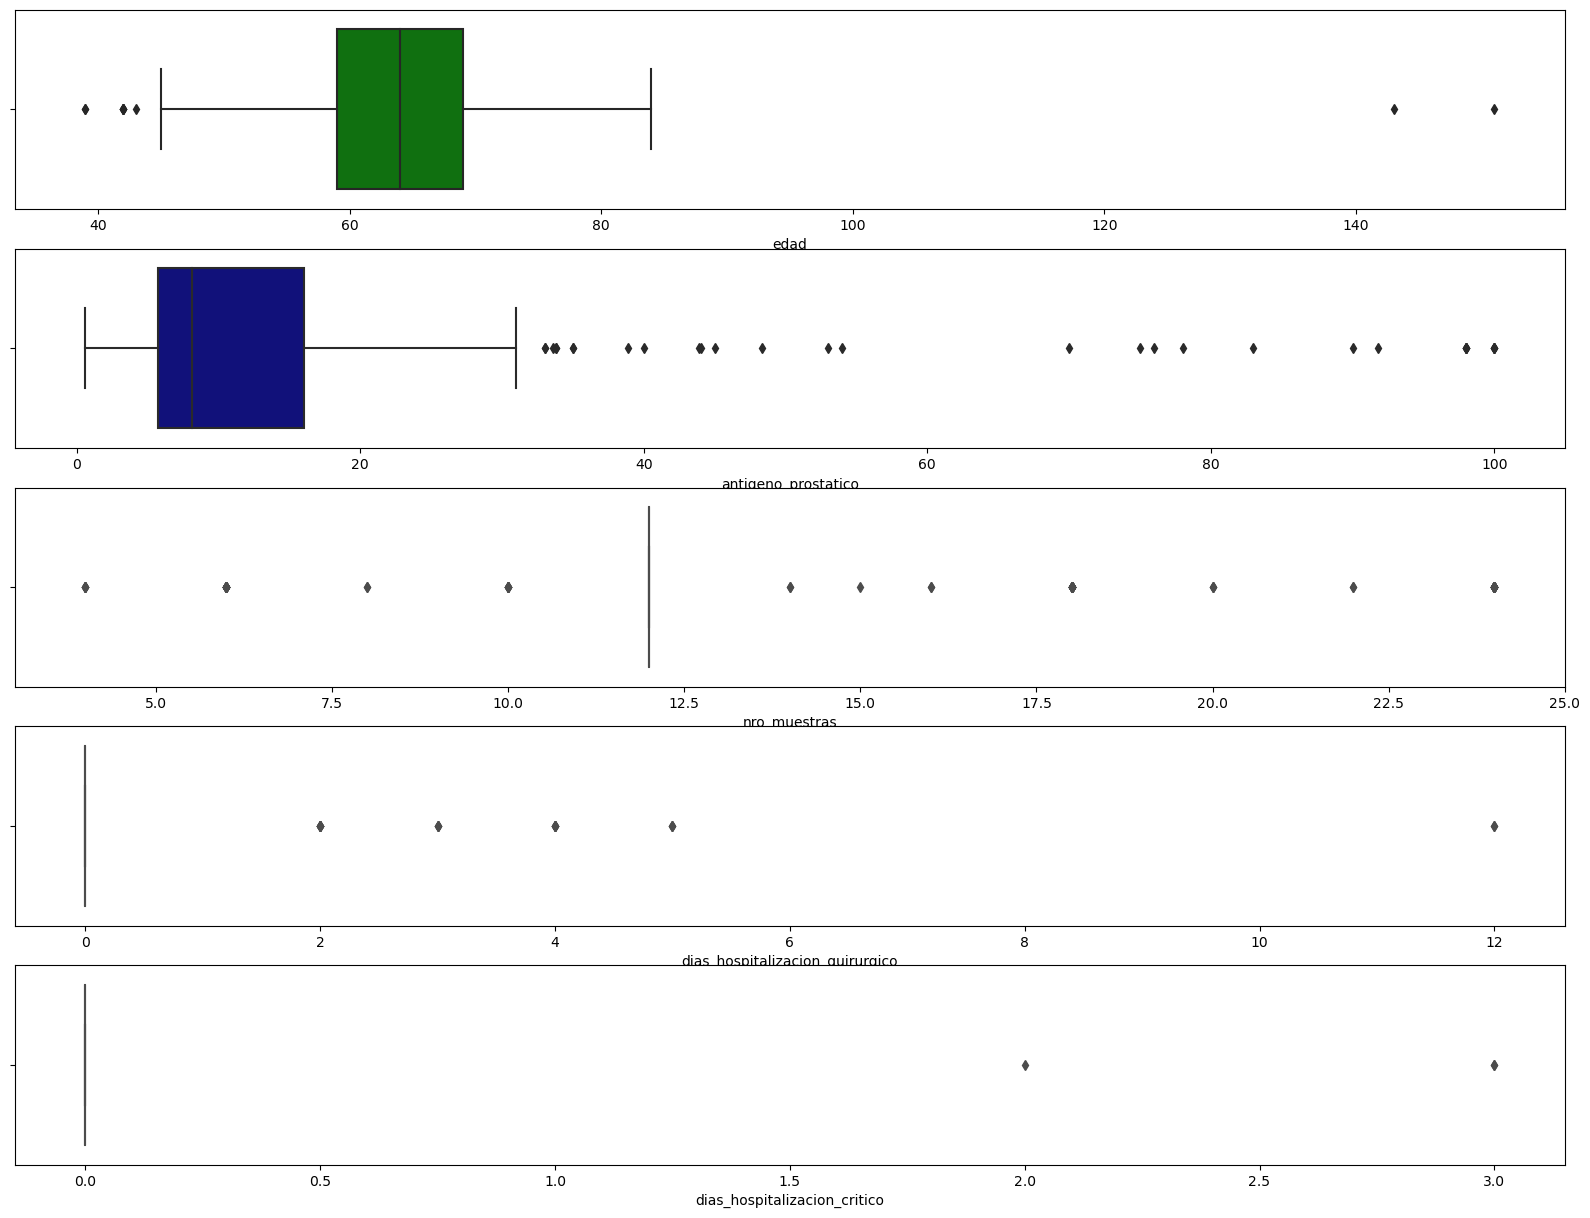

In [35]:
plt.figure(figsize= (20,15))
plt.subplot(5,1,1)
sns.boxplot(x= df.edad, color='green')

plt.subplot(5,1,2)
sns.boxplot(x= df.antigeno_prostatico, color='darkblue')

plt.subplot(5,1,3)
sns.boxplot(x= df.nro_muestras, color='red')

plt.subplot(5,1,4)
sns.boxplot(x= df.dias_hospitalizacion_quirurgico, color='blue')

plt.subplot(5,1,5)
sns.boxplot(x= df.dias_hospitalizacion_critico, color='yellow')

plt.show()

In [36]:
# Observamos outliers en todas las columnas numéricas pero evaluaremos más adelante la relevancia de los mismos

### c) Análisis descriptivo de los datos

In [37]:
# Variables cuantitativas
df.describe()

,edad,antigeno_prostatico,nro_muestras,dias_hospitalizacion_quirurgico,dias_hospitalizacion_critico
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,64.285078,14.167550,12.919822,0.202673,0.017817
std,9.859901,17.154908,3.980172,1.065444,0.220882
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000
50%,64.000000,8.100000,12.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


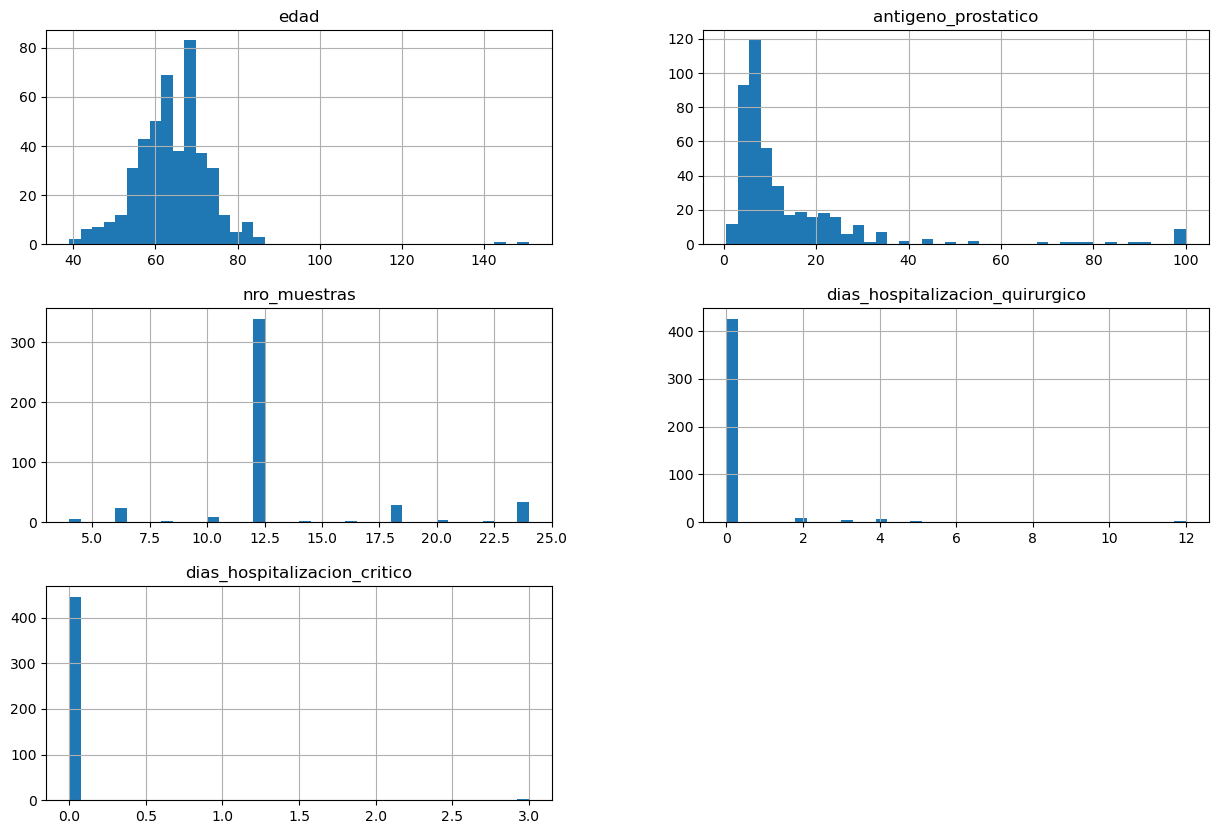

In [38]:
df.hist(bins=40, figsize= (15, 10))
plt.show()

In [39]:
#Consideramos conveniente tratar la variable 'edad' y 'antigeno_prostatico'

#### Filtramos outliers

In [40]:
# IQR 'edad'
Q1 = np.percentile(df['edad'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['edad'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartílico (IQR) de edad es {IQR}")

El rango intercuartílico (IQR) de edad es 10.0


C:\Users\johan\AppData\Local\Temp\ipykernel_2392\1783530864.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['edad'], 25,
C:\Users\johan\AppData\Local\Temp\ipykernel_2392\1783530864.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['edad'], 75,


In [41]:
#Limites en 'edad'
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR
print(limite_inferior, limite_superior)

44.0 84.0


In [42]:
#Filtramos
df[(df['edad']<limite_inferior) | (df['edad']>limite_superior)]

,edad,diabetes,hospitalizacion_ultimo_mes,antigeno_prostatico,biopsia_previa,volumen_prostatico,antibiotico_profilaxis,nro_muestras,cateter_biopsia,enfermedad_pulmonar_cronica,...,dias_infeccion_post_biopsia,fiebre,infeccion_urinaria,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hospitalizacion_quirurgico,dias_hospitalizacion_critico,infeccion_post_biopsia
13,43.0,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,2,NO,NO,NO,NO,NO,SI,3.0,0.0,Si
55,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
56,42.0,NO,NO,53.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
159,42.0,NO,NO,6.0,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
161,143.0,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
181,151.0,NO,NO,5.7,NO,SI,OTROS,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
224,39.0,NO,NO,3.6,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
309,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,SI,NO,NO,NO,NO,NO,0.0,0.0,NO
310,42.0,NO,NO,54.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
481,39.0,NO,NO,3.9,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [43]:
#Al observar que la edad presenta una distribución normal sin los valores de outliers, procedemos a reemplazar los 2 outliers más alejados por el promedio de la distribución

media_edad = np.mean(df.edad)
df.loc[[161, 181], 'edad'] = media_edad



In [44]:
#controlamos
df[(df['edad']<limite_inferior) | (df['edad']>limite_superior)]

,edad,diabetes,hospitalizacion_ultimo_mes,antigeno_prostatico,biopsia_previa,volumen_prostatico,antibiotico_profilaxis,nro_muestras,cateter_biopsia,enfermedad_pulmonar_cronica,...,dias_infeccion_post_biopsia,fiebre,infeccion_urinaria,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hospitalizacion_quirurgico,dias_hospitalizacion_critico,infeccion_post_biopsia
13,43.0,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,2,NO,NO,NO,NO,NO,SI,3.0,0.0,Si
55,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
56,42.0,NO,NO,53.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
159,42.0,NO,NO,6.0,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
224,39.0,NO,NO,3.6,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
309,42.0,NO,NO,8.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,SI,NO,NO,NO,NO,NO,0.0,0.0,NO
310,42.0,NO,NO,54.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
481,39.0,NO,NO,3.9,NO,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [45]:
print(df.edad[161],df.edad[181])

64.28507795100222 64.28507795100222


array([[<AxesSubplot: title={'center': 'edad'}>]], dtype=object)

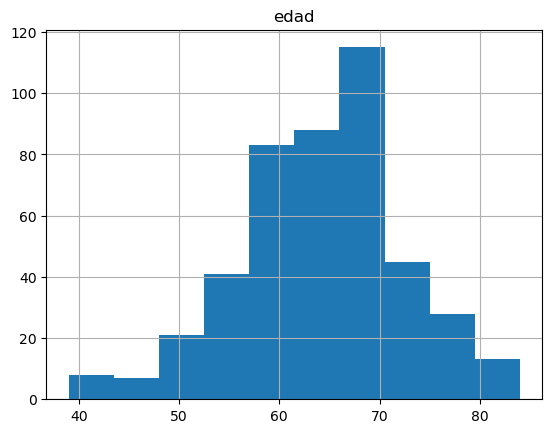

In [46]:
#Volvemos a revisar la distribución y el boxplot
df.hist('edad')


<AxesSubplot: xlabel='edad'>

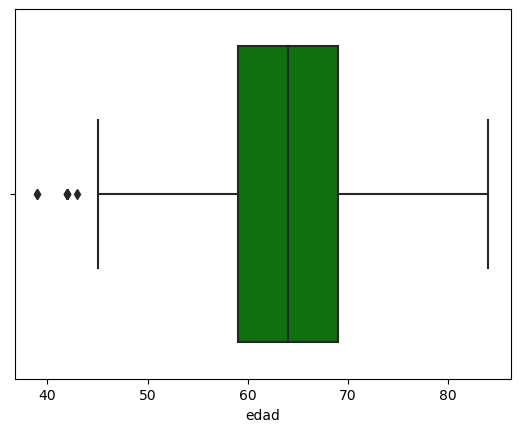

In [47]:
#Si bien se detectan algunos outliers, no son considerados estrictamente atípicos
sns.boxplot(x= df.edad, color='green')

In [48]:
#IQR 'antigeno_prostatico'
Q1 = np.percentile(df['antigeno_prostatico'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['antigeno_prostatico'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartílico (IQR) de antigeno_prostatico es {IQR}")

#Limites en 'antigeno_prostatico'
limite_inferior_antigeno = Q1 - 1.5*IQR
limite_superior_antigeno = Q3 + 1.5*IQR
print(limite_inferior_antigeno, limite_superior_antigeno)

#Filtramos
outliers_antigeno = df[(df['antigeno_prostatico']<limite_inferior_antigeno) | (df['antigeno_prostatico']>limite_superior_antigeno)]
outliers_antigeno

El rango intercuartílico (IQR) de antigeno_prostatico es 10.3
-9.75 31.450000000000003


C:\Users\johan\AppData\Local\Temp\ipykernel_2392\1598555827.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['antigeno_prostatico'], 25,
C:\Users\johan\AppData\Local\Temp\ipykernel_2392\1598555827.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['antigeno_prostatico'], 75,


,edad,diabetes,hospitalizacion_ultimo_mes,antigeno_prostatico,biopsia_previa,volumen_prostatico,antibiotico_profilaxis,nro_muestras,cateter_biopsia,enfermedad_pulmonar_cronica,...,dias_infeccion_post_biopsia,fiebre,infeccion_urinaria,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hospitalizacion_quirurgico,dias_hospitalizacion_critico,infeccion_post_biopsia
27,77.0,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
29,77.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
34,53.0,NO,NO,90.0,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
40,53.0,NO,NO,100.0,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
46,84.0,NO,NO,38.9,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,SI,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
48,84.0,NO,NO,40.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,SI,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
56,42.0,NO,NO,53.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
77,54.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
111,68.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO
114,64.0,NO,NO,100.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0.0,0.0,NO


In [49]:
#Al observar que 'antigeno_prostatico' presenta una distribución sesgada a la derecha, procedemos a reemplazar los outliers por la mediana de la distribución

mediana_antigeno = np.median(df.antigeno_prostatico)
lista_indices = outliers_antigeno.index.tolist()
df.loc[lista_indices, "antigeno_prostatico"] = mediana_antigeno


array([[<AxesSubplot: title={'center': 'antigeno_prostatico'}>]],
      dtype=object)

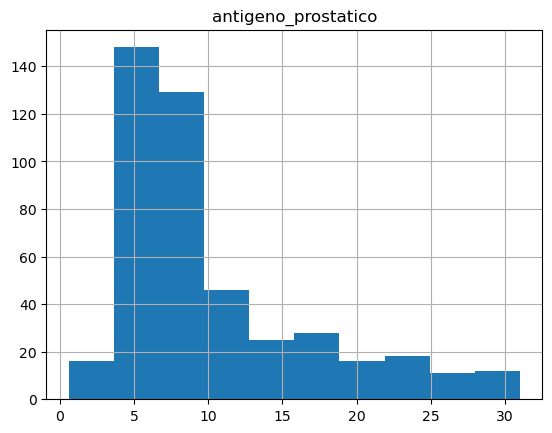

In [50]:
#Volvemos a revisar la distribución y el boxplot
df.hist('antigeno_prostatico')

<AxesSubplot: xlabel='antigeno_prostatico'>

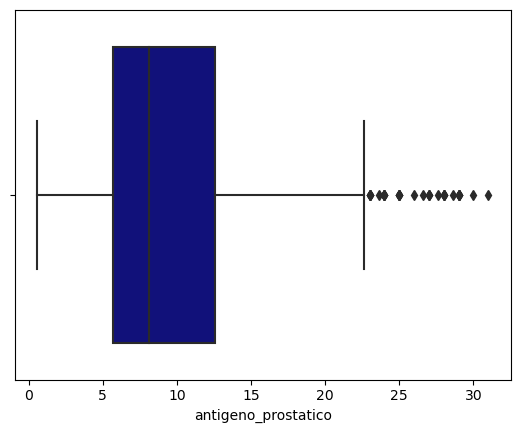

In [51]:
#Si bien la distribución continúa presentando outliers, los consideramos para el análisis
sns.boxplot(x= df.antigeno_prostatico, color='darkblue')

In [52]:
df.shape

(449, 21)

### d) Gráficos de barras

In [53]:
#Identificamos columnas catégoricas

categorical_data = df.select_dtypes(exclude=[np.number])

print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['diabetes', 'hospitalizacion_ultimo_mes', 'biopsia_previa', 'volumen_prostatico', 'antibiotico_profilaxis', 'cateter_biopsia', 'enfermedad_pulmonar_cronica', 'resultado_biopsia', 'dias_infeccion_post_biopsia', 'fiebre', 'infeccion_urinaria', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion', 'infeccion_post_biopsia']


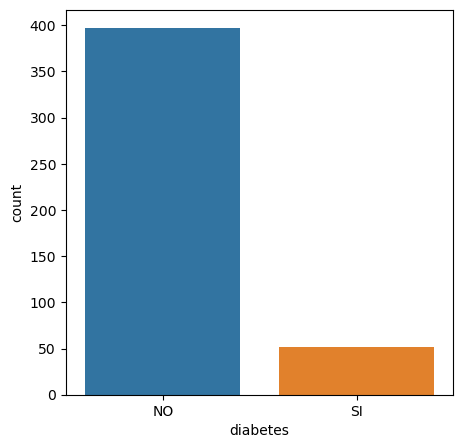

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(x='diabetes', data=df) 
plt.show()

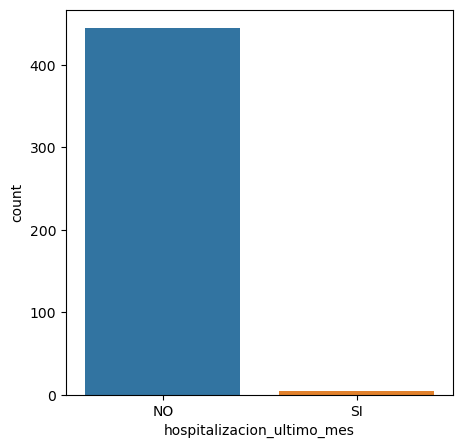

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(x='hospitalizacion_ultimo_mes', data=df) 
plt.show()

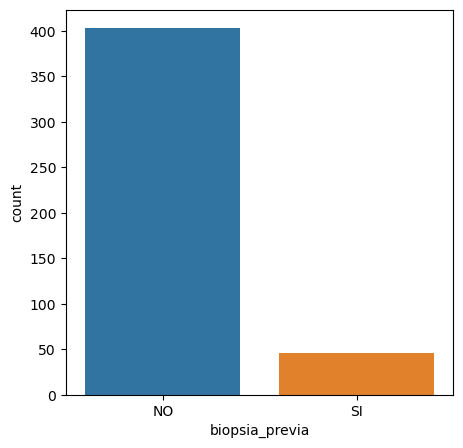

In [56]:
plt.figure(figsize=(5,5))
sns.countplot(x='biopsia_previa', data=df) 
plt.show()

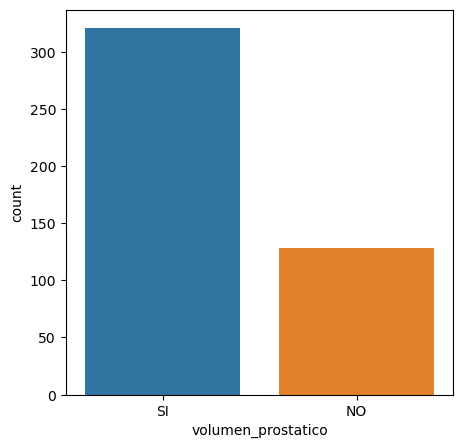

In [57]:
plt.figure(figsize=(5,5))
sns.countplot(x='volumen_prostatico', data=df) 
plt.show()

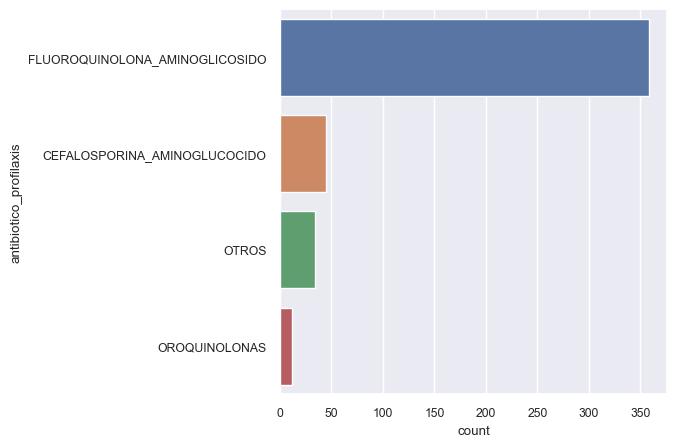

In [58]:
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.countplot(y='antibiotico_profilaxis', data=df, order=df['antibiotico_profilaxis'].value_counts().sort_values(ascending=False).index)
plt.show()

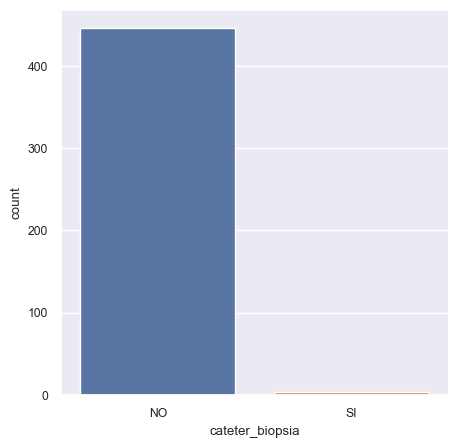

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x='cateter_biopsia', data=df) 
plt.show()

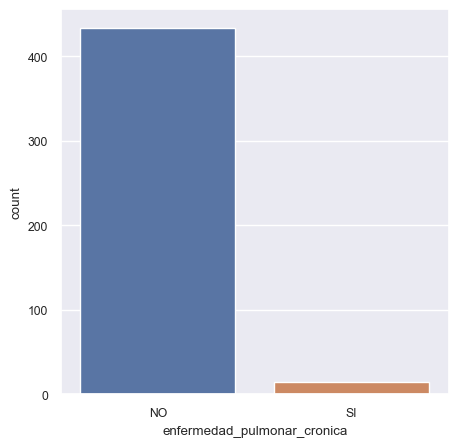

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x='enfermedad_pulmonar_cronica', data=df) 
plt.show()

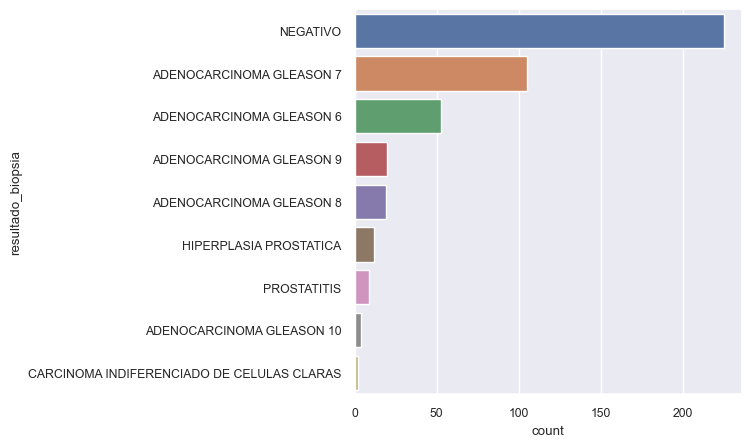

In [61]:
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.countplot(y='resultado_biopsia', data=df, order=df['resultado_biopsia'].value_counts().sort_values(ascending=False).index)
plt.show()

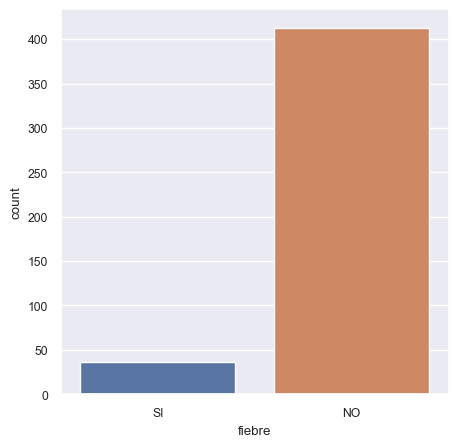

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='fiebre', data=df) 
plt.show()

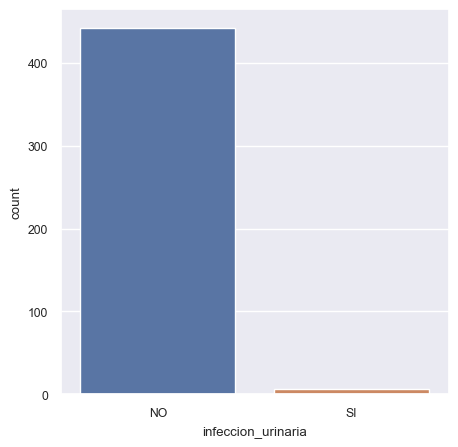

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='infeccion_urinaria', data=df) 
plt.show()

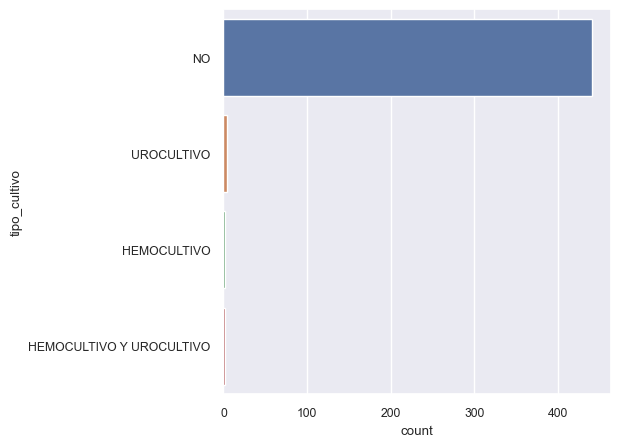

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(y='tipo_cultivo', data=df, order=df['tipo_cultivo'].value_counts().sort_values(ascending=False).index) 
plt.show()

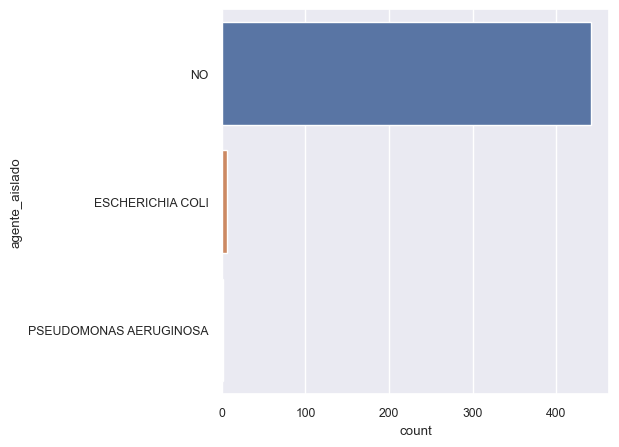

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(y='agente_aislado', data=df) 
plt.show()

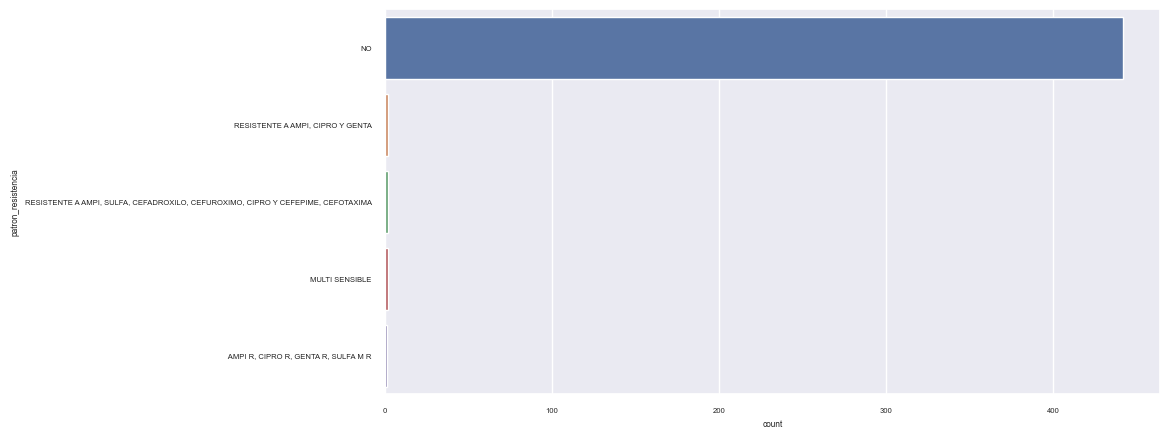

In [66]:
plt.figure(figsize=(10,5))
sns.set(font_scale=0.5)
sns.countplot(y='patron_resistencia', data=df, order=df['patron_resistencia'].value_counts().sort_values(ascending=False).index)
plt.show()

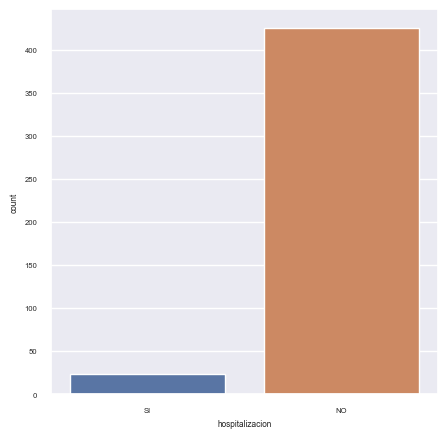

In [67]:
plt.figure(figsize=(5,5))
sns.countplot(x='hospitalizacion', data=df) 
plt.show()

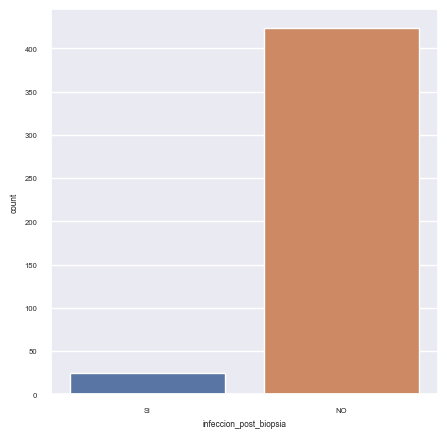

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(x='infeccion_post_biopsia', data=df) 
plt.show()

### e) Tablas cruzadas

In [69]:
#Identificamos columnas catégoricas

categorical_data = df.select_dtypes(exclude=[np.number])

print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['diabetes', 'hospitalizacion_ultimo_mes', 'biopsia_previa', 'volumen_prostatico', 'antibiotico_profilaxis', 'cateter_biopsia', 'enfermedad_pulmonar_cronica', 'resultado_biopsia', 'dias_infeccion_post_biopsia', 'fiebre', 'infeccion_urinaria', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion', 'infeccion_post_biopsia']


In [70]:
pd.crosstab(df['diabetes'], df['hospitalizacion'], margins=True, margins_name="Total")

hospitalizacion,NO,SI,Total
diabetes,,,
NO,379,18,397
SI,47,5,52
Total,426,23,449


In [71]:
pd.crosstab(df['volumen_prostatico'], df['hospitalizacion'], margins=True, margins_name="Total")

hospitalizacion,NO,SI,Total
volumen_prostatico,,,
NO,123,5,128
SI,303,18,321
Total,426,23,449


In [72]:
pd.crosstab(df['fiebre'], df['hospitalizacion'], margins=True, margins_name="Total")

hospitalizacion,NO,SI,Total
fiebre,,,
NO,410,3,413
SI,16,20,36
Total,426,23,449


In [73]:
pd.crosstab(df['infeccion_post_biopsia'], df['hospitalizacion'], margins=True, margins_name="Total")

hospitalizacion,NO,SI,Total
infeccion_post_biopsia,,,
NO,424,0,424
Si,2,23,25
Total,426,23,449


In [74]:
pd.crosstab(df['agente_aislado'], df['hospitalizacion'], margins=True, margins_name="Total")

hospitalizacion,NO,SI,Total
agente_aislado,,,
ESCHERICHIA COLI,0,6,6
NO,426,15,441
PSEUDOMONAS AERUGINOSA,0,2,2
Total,426,23,449


In [75]:
pd.crosstab(df['tipo_cultivo'], df['hospitalizacion'], margins=True, margins_name="Total")

hospitalizacion,NO,SI,Total
tipo_cultivo,,,
HEMOCULTIVO,0,2,2
HEMOCULTIVO Y UROCULTIVO,0,2,2
NO,426,15,441
UROCULTIVO,0,4,4
Total,426,23,449


In [76]:
pd.crosstab(df['resultado_biopsia'], df['hospitalizacion'], margins=True, margins_name="Total")

hospitalizacion,NO,SI,Total
resultado_biopsia,,,
ADENOCARCINOMA GLEASON 10,4,0,4
ADENOCARCINOMA GLEASON 6,51,2,53
ADENOCARCINOMA GLEASON 7,103,2,105
ADENOCARCINOMA GLEASON 8,19,0,19
ADENOCARCINOMA GLEASON 9,20,0,20
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,2,0,2
HIPERPLASIA PROSTATICA,12,0,12
NEGATIVO,206,19,225
PROSTATITIS,9,0,9


### f) Discretizamos variables cualitativas

In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()   #para convertir los si en 1 y los no en 0

In [78]:
#Identificamos columnas catégoricas

categorical_data = df.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(categorical_data.columns))

Columnas catégoricas:
 ['diabetes', 'hospitalizacion_ultimo_mes', 'biopsia_previa', 'volumen_prostatico', 'antibiotico_profilaxis', 'cateter_biopsia', 'enfermedad_pulmonar_cronica', 'resultado_biopsia', 'dias_infeccion_post_biopsia', 'fiebre', 'infeccion_urinaria', 'tipo_cultivo', 'agente_aislado', 'patron_resistencia', 'hospitalizacion', 'infeccion_post_biopsia']


In [79]:
#Agregamos nuevas columnas con valores discretizados (0,1)
df['diabetes_2'] = le.fit_transform(df['diabetes'])
df['hospitalizacion_ultimo_mes_2'] = le.fit_transform(df['hospitalizacion_ultimo_mes'])
df['biopsia_previa_2'] = le.fit_transform(df['biopsia_previa'])
df['volumen_prostatico_2'] = le.fit_transform(df['volumen_prostatico'])
df['cateter_biopsia_2'] = le.fit_transform(df['cateter_biopsia'])
df['enfermedad_pulmonar_cronica_2'] = le.fit_transform(df['enfermedad_pulmonar_cronica'])
df['fiebre_2'] = le.fit_transform(df['fiebre'])
df['infeccion_urinaria_2'] = le.fit_transform(df['infeccion_urinaria'])
df['hospitalizacion_2'] = le.fit_transform(df['hospitalizacion'])
df['infeccion_post_biopsia_2'] = le.fit_transform(df['infeccion_post_biopsia'])

In [80]:
#Eliminamos columnas innecesarias
df = df.drop(['diabetes', 'hospitalizacion_ultimo_mes', 'biopsia_previa', 'volumen_prostatico', 'cateter_biopsia', 'enfermedad_pulmonar_cronica', 'fiebre', 'infeccion_urinaria', 'hospitalizacion', 'infeccion_post_biopsia'], axis = 1)
df.head()

,edad,antigeno_prostatico,antibiotico_profilaxis,nro_muestras,resultado_biopsia,dias_infeccion_post_biopsia,tipo_cultivo,agente_aislado,patron_resistencia,dias_hospitalizacion_quirurgico,...,diabetes_2,hospitalizacion_ultimo_mes_2,biopsia_previa_2,volumen_prostatico_2,cateter_biopsia_2,enfermedad_pulmonar_cronica_2,fiebre_2,infeccion_urinaria_2,hospitalizacion_2,infeccion_post_biopsia_2
0,53.0,4.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEGATIVO,1,NO,NO,NO,2.0,...,0,0,0,1,0,0,1,0,1,1
1,56.0,7.7,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEGATIVO,1,NO,NO,NO,5.0,...,0,0,0,1,0,0,1,0,1,1
2,57.0,29.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NEGATIVO,1,HEMOCULTIVO,ESCHERICHIA COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",4.0,...,0,0,1,1,0,0,1,0,1,1
3,56.0,7.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEGATIVO,1,NO,NO,NO,5.0,...,0,0,0,1,0,0,1,0,1,1
4,55.0,29.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NEGATIVO,1,HEMOCULTIVO,ESCHERICHIA COLI,NO,4.0,...,0,0,1,1,0,0,1,0,1,1


In [81]:
df.shape

(449, 21)

### g) Matriz de correlación

C:\Users\johan\AppData\Local\Temp\ipykernel_2392\352750073.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<AxesSubplot: >

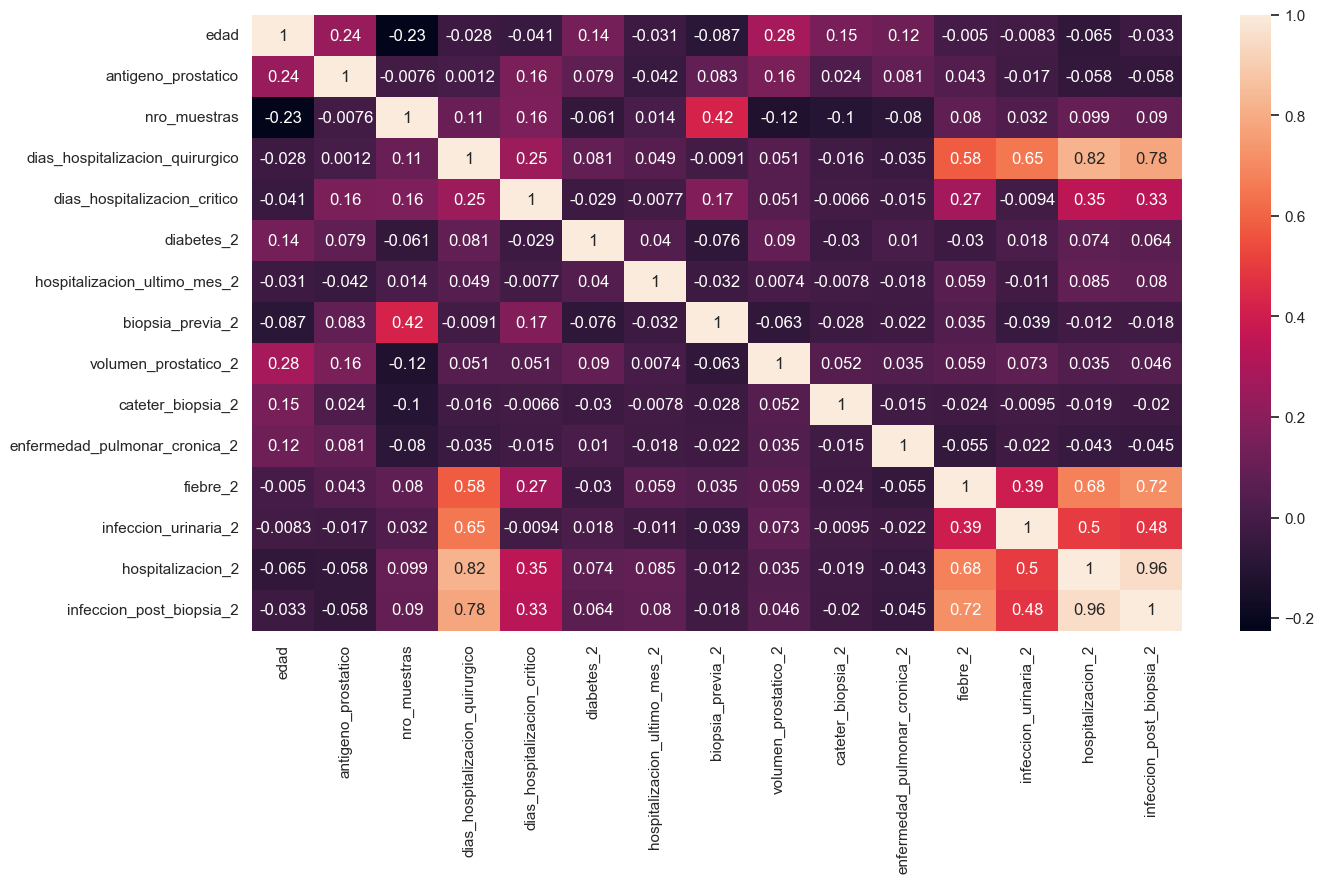

In [82]:
correlation=df.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            annot=True
) 

In [83]:
#A priori podemos considerar que las variables que pueden explicar 'hospitalizacion' son 
#'fiebre', 'infeccion_urinaria' e 'infeccion_post_biopsia'

### h) Pairplots

c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (3) than n

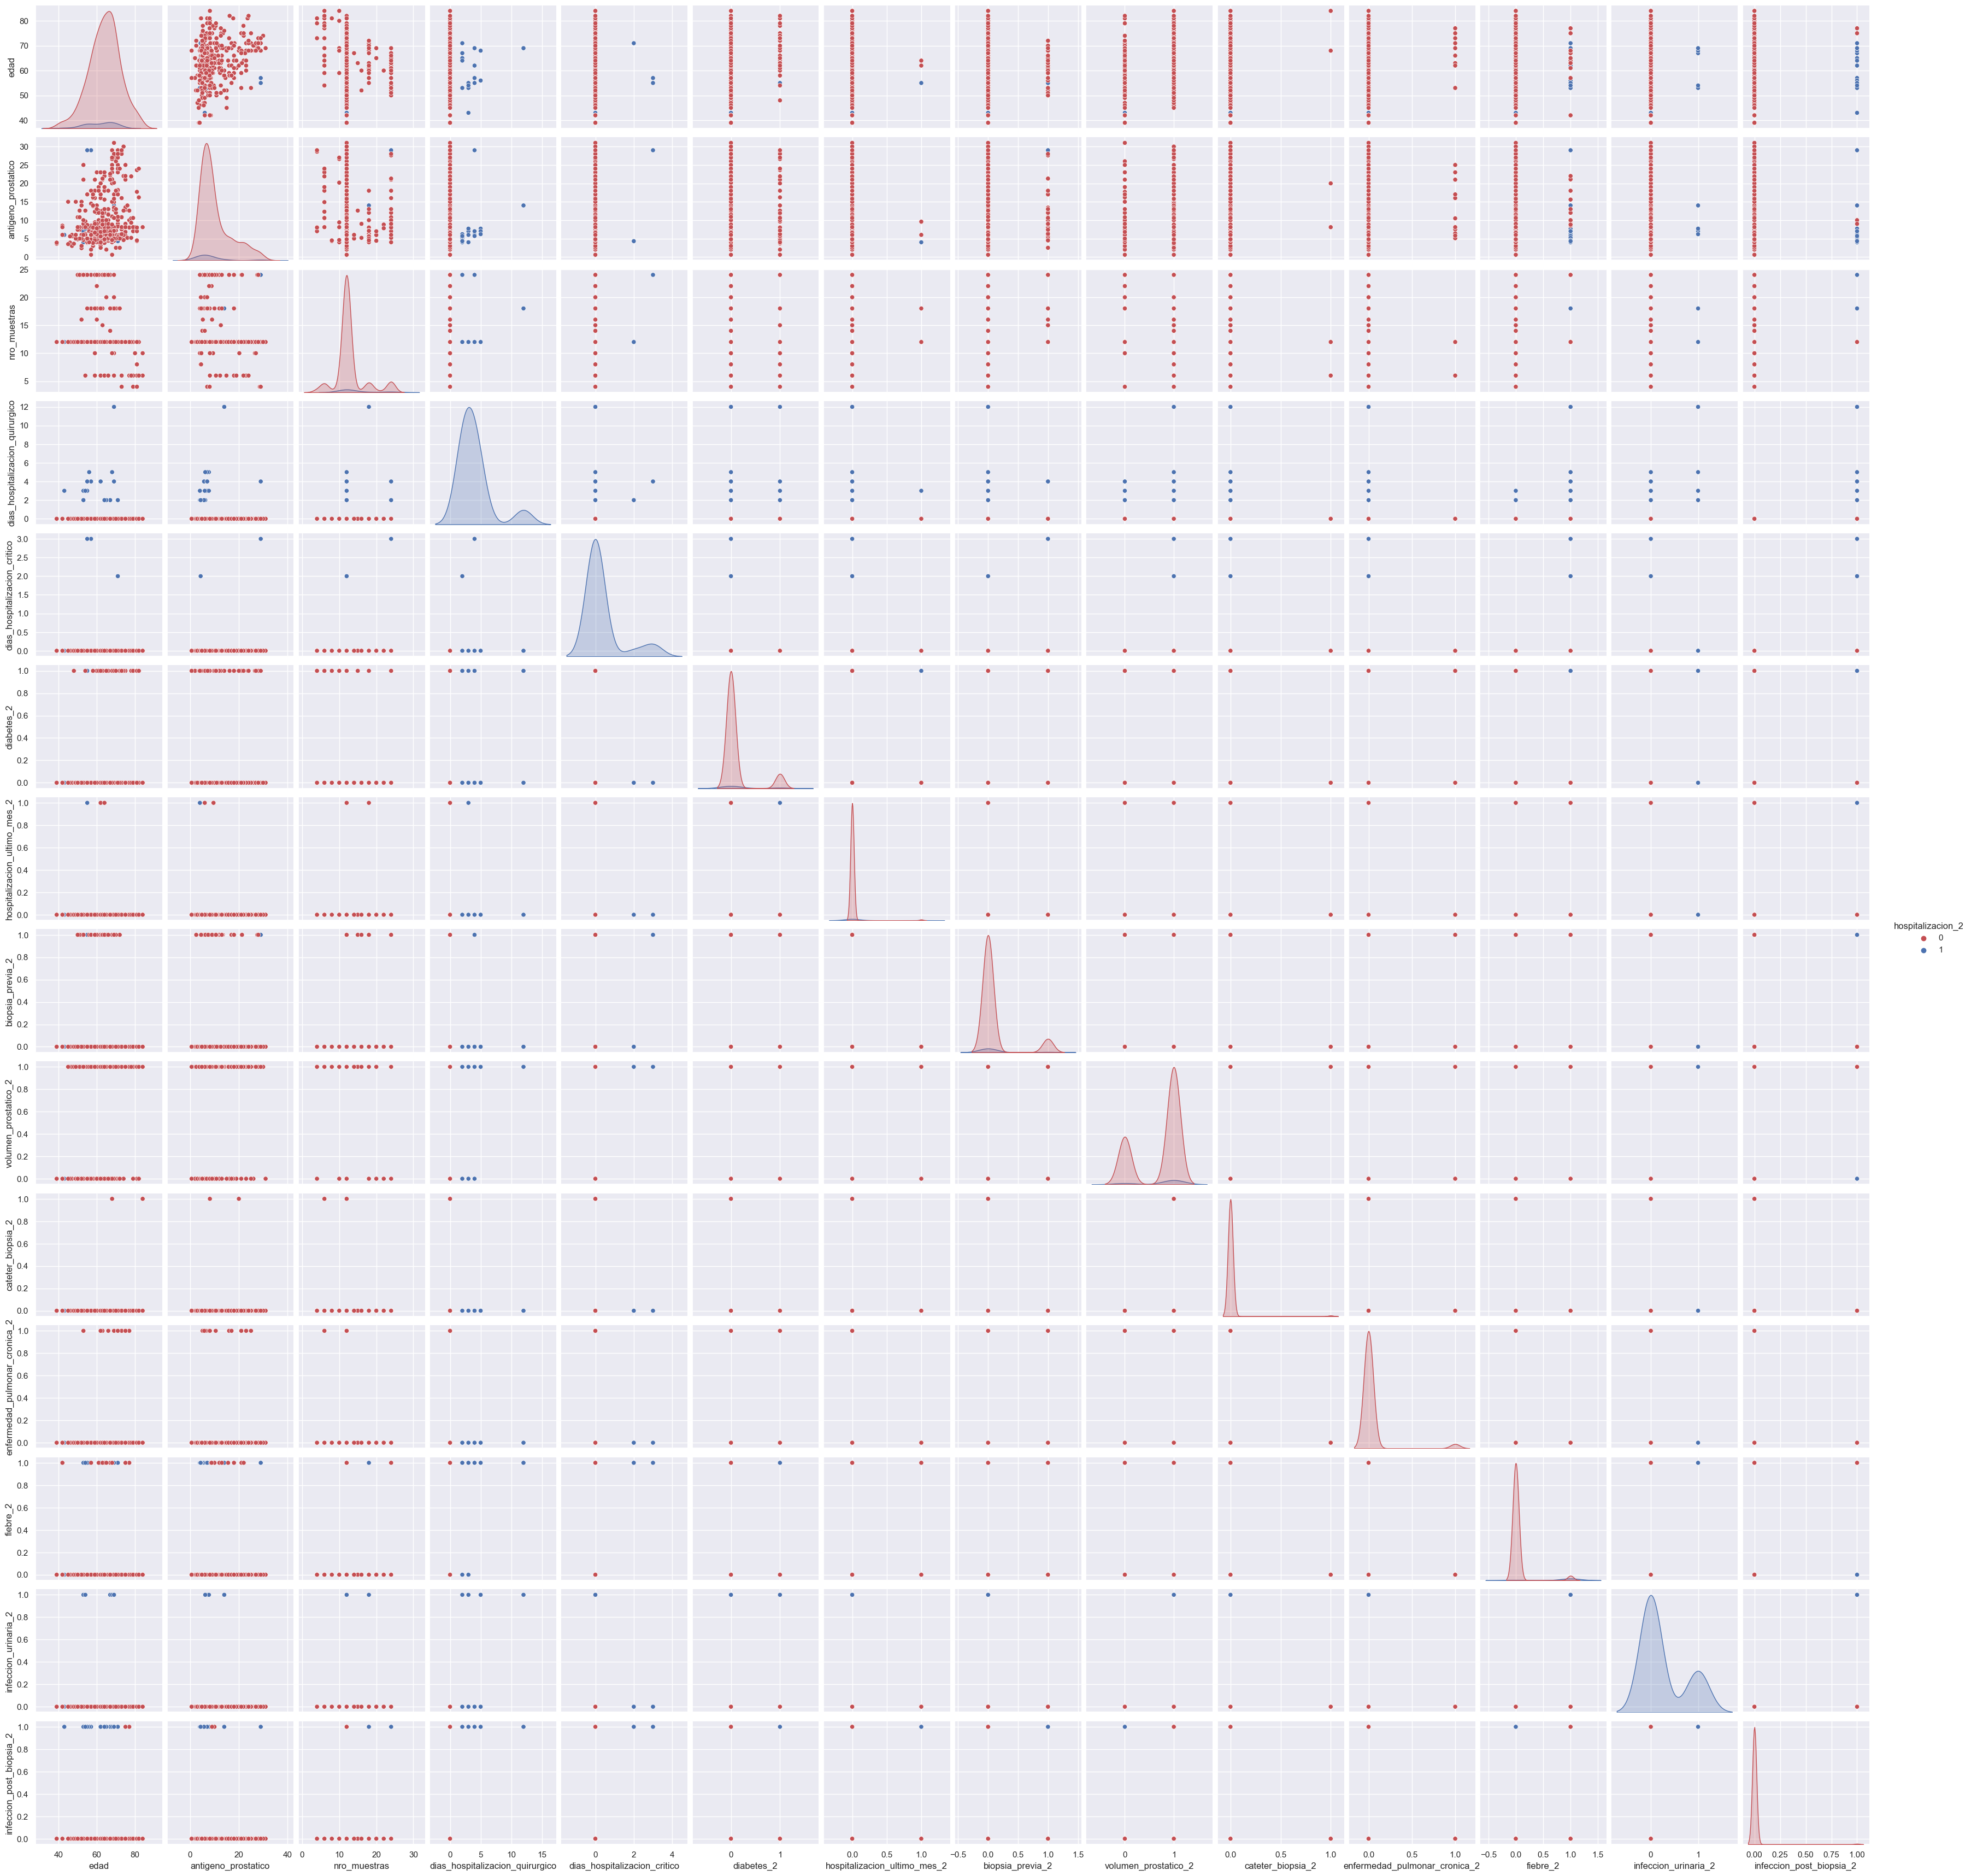

In [84]:
sns.pairplot(df, hue="hospitalizacion_2", palette = ['r', 'b', 'g'])
plt.show()

## 4) Modelamiento

### a) Árbol de decisión

In [85]:
#Vamos a elegir 2 atributos para predecir la etiqueta 'hospitalizacion_2': 'antigeno_prostatico' y 'edad'

X = df[['antigeno_prostatico', 'edad']]  # Denotamos X con mayúscula ya que incluye más de un atributo
y = df.hospitalizacion_2 # Etiqueta a predecir

In [86]:
X.head()

,antigeno_prostatico,edad
0,4.0,53.0
1,7.7,56.0
2,29.0,57.0
3,7.0,56.0
4,29.0,55.0


In [87]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: hospitalizacion_2, dtype: int32

In [88]:
# Importamos librerías necesarias

from IPython.display import clear_output
#importamos los métodos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#importamos exactitud y validación cruzada
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [89]:
# Creamos listas para incorporarles valores de la media de exactitud tanto para conjunto de entrenamiento como de evaluación. También vamos a grabar la desviación estándar

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

#creamos una lista de profundidades del 1 al 19.
profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
#iteramos con varios modelos
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad) #el hiperparametro va a ir cambiando de acuerdo a los valores de la lista
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1) #cv=5 es el numero de folios para hacer la validación cruzada
    
    #agregamos las medias y desv. est.
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


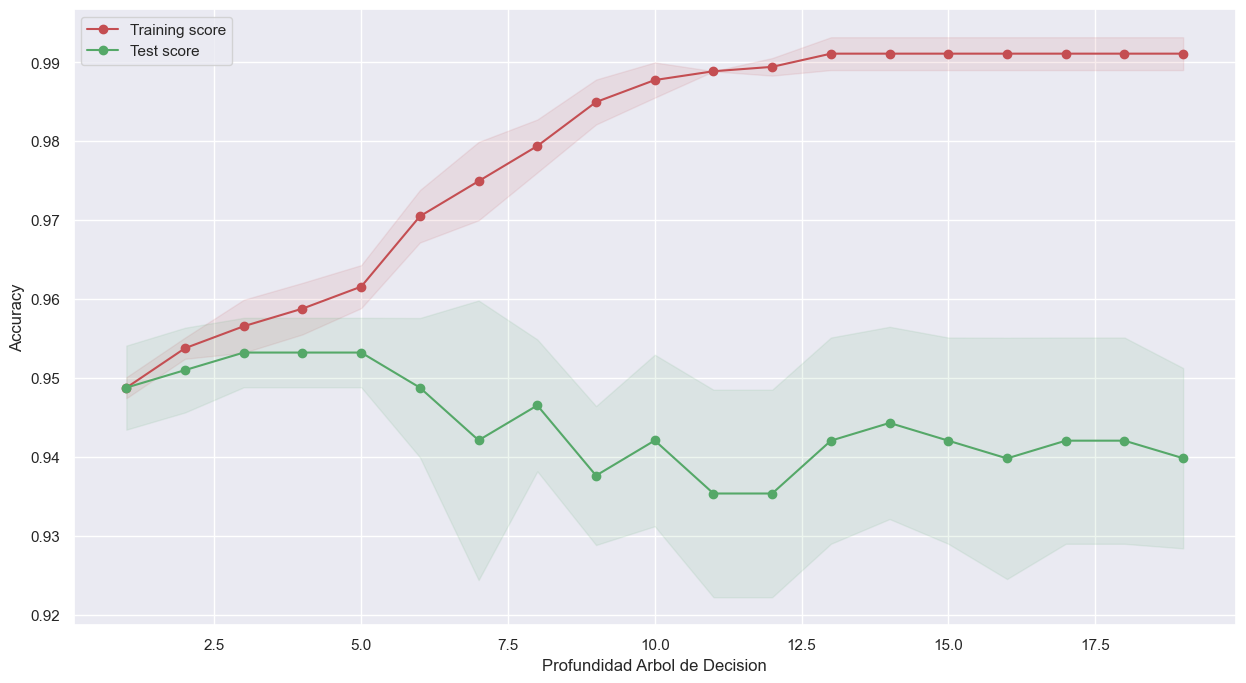

In [90]:
# Visualizamos como varia la exactitud del modelo en base a la profundidad del arbol para conjuntos de entrenamiento y evaluación

plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

#el valor óptimo de profundidad sería 2. Ya que con más capas del árbol el modelo tiende al overfitting

In [91]:
#Separamos en datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)   

In [92]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [93]:
# Entrenamos el modelo

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [94]:
# Analizamos

print(clf.classes_) #los tipos de hospitalizacion
print(clf.n_classes_) #el numero de clases o tipos de hospitalizacion
print(clf.max_features_) #cantidad maxima de atributos  
print(clf.feature_importances_) #importancia de los valores respecto a la variable objetivo. El primero tiene mas importancia (length)

[0 1]
2
2
[0.5750707 0.4249293]


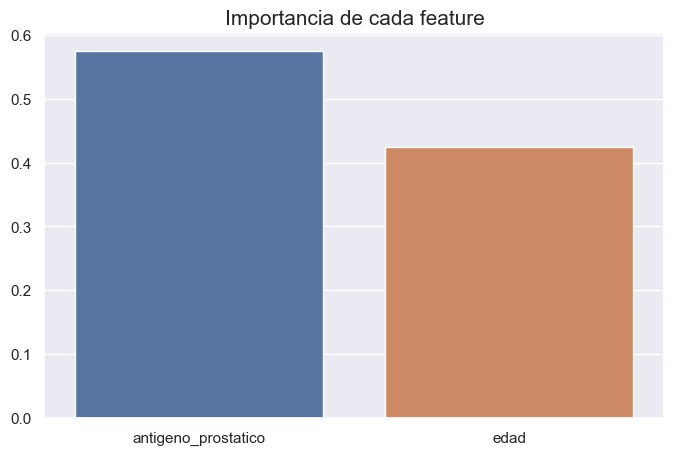

In [95]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

In [96]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_test)

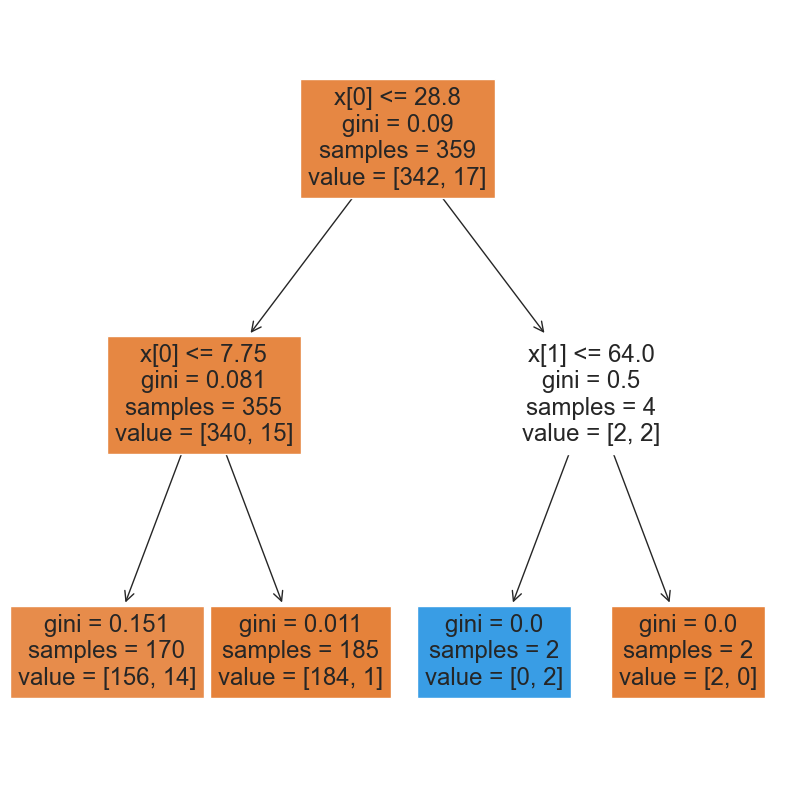

In [97]:
# Graficamos el arbol

from sklearn import tree

plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled=True)
plt.show()


In [98]:
#Revisamos métricas de precisión

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred))

0.958217270194986


In [99]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_test_pred))

0.9333333333333333


c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


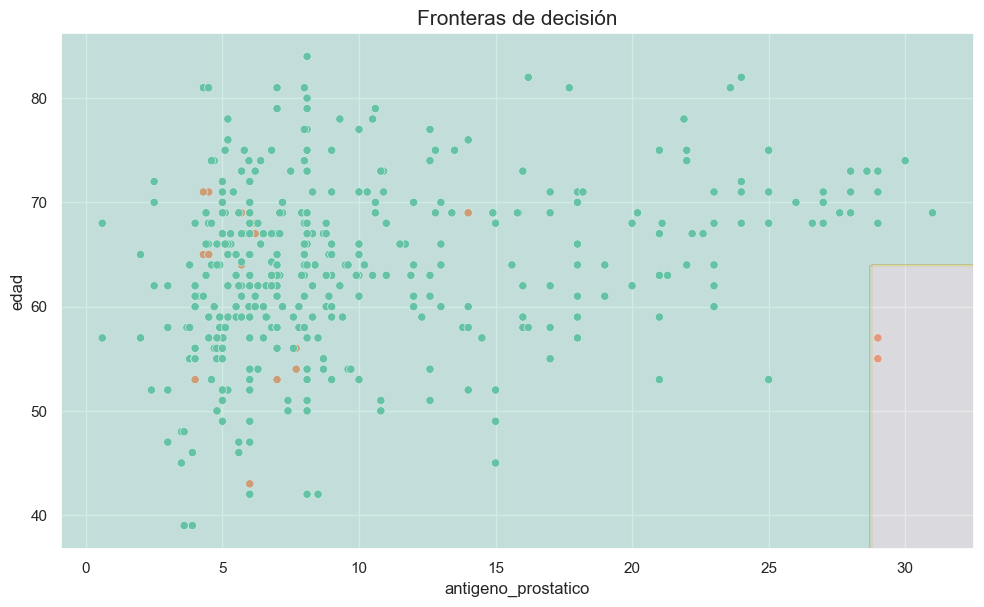

In [100]:
# Fronteras de decisión

plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue= y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

In [101]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

matrix



array([[342,   0],
       [ 15,   2]], dtype=int64)

Podemos observar que el modelo detecta correctamente los Verdaderos Positivos y los Falsos Positivos. <br> 
No obstante no detecta del todo correcto a los Falsos Negativos y a los Verdaderos Negativos

In [102]:
# Evaluación del modelo

from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       357
           1       0.12      1.00      0.21         2

    accuracy                           0.96       359
   macro avg       0.56      0.98      0.59       359
weighted avg       1.00      0.96      0.97       359



Para la clase 0 (no hospitalizado) el modelo tiene una alta precisión y una alta exhaustividad, por lo que maneja perfectamente la clase.<br>
Para la clase 1 (hospitalizado) el modelo presenta baja precisión y alta exhaustividad, por lo que la clase está bien detectada pero el modelo incluye puntos de otras clases. <br>
El modelo presenta una exactitud del 0.96


### b) Vecinos Cercanos (k-Vecinos)

In [103]:
#Vamos a elegir 2 atributos para predecir la etiqueta 'hospitalizacion_2': 'antigeno_prostatico' y 'edad'

X = df[['antigeno_prostatico', 'edad']]  # Denotamos X con mayúscula ya que incluye más de un atributo
y = df.hospitalizacion_2 # Etiqueta a predecir

In [104]:
#Separamos en datos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)   

In [105]:
# Creamos listas para incorporarles valores de la media de exactitud tanto para conjunto de entrenamiento como de evaluación. También vamos a grabar la desviación estándar

knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


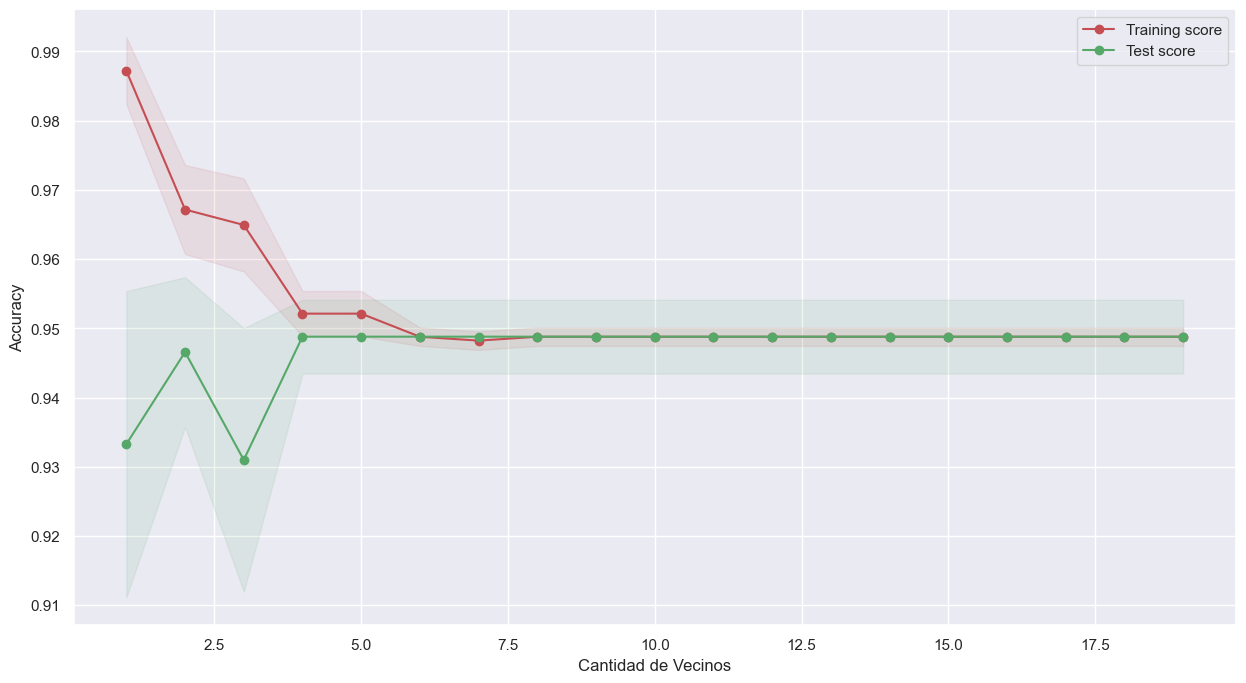

In [106]:
# Visualizamos como varia la exactitud del modelo en base a la cantidad de vecinos para conjuntos de entrenamiento y evaluación

plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

#esta curva nos dice que con 6 vecinos tendemos al overfitting porque estamos haciendo un modelo muy complejo
#a medida que aumento la cantidad de vecinos, la situación se normaliza y la performance se mantiene igual

In [107]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3) #Utilizamos 3 vecinos ya que de esta manera el modelo reduce a mínimo la cantidad de Falsos Positivos y Falsos Negativos

In [108]:
# Entrenamos

clf.fit(X.values,y.values)

KNeighborsClassifier(n_neighbors=3)

In [109]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_test)

c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\johan\anaconda3\envs\FundamentoAL3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [110]:
# Evaluamos

print(accuracy_score(y_test,y_test_pred))

0.9444444444444444


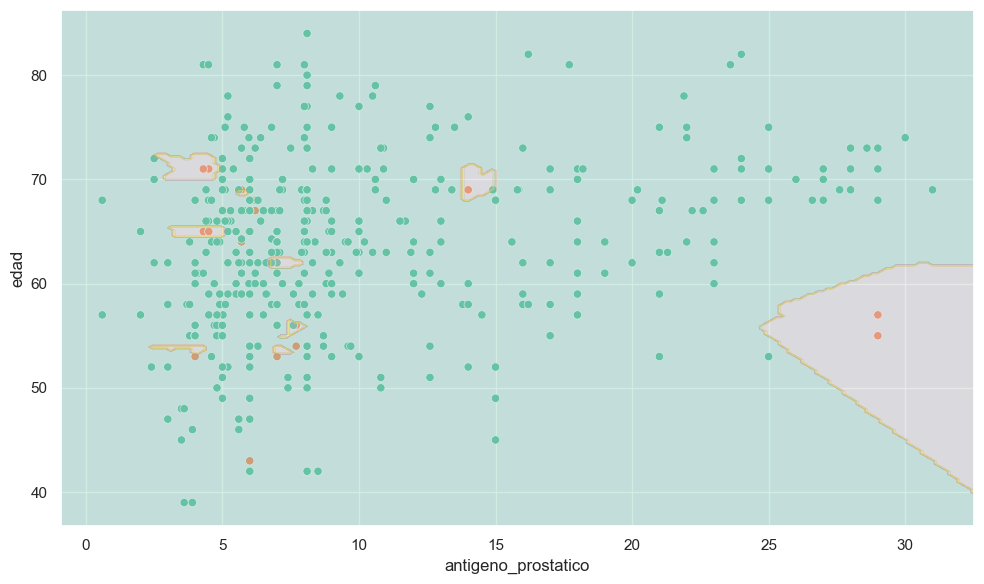

In [111]:
# Graficamos

plt.figure(figsize= (10,6))
ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue=y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.show()

In [112]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

matrix


array([[339,   3],
       [  7,  10]], dtype=int64)

Podemos concluir que este modelo no grafica en forma correcta las fronteras pero analizando la matriz de confusión resulta apropiado.

In [113]:
# Evaluación del modelo

from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       346
           1       0.59      0.77      0.67        13

    accuracy                           0.97       359
   macro avg       0.79      0.87      0.83       359
weighted avg       0.98      0.97      0.97       359



El modelo maneja correctamente la clase 0 (no hospitalizado). <br>
Para la clase 1 (hospitalizado) podemos decir que el modelo no detecta muy bien la clase pero que es confiable cuando lo hace.